# TRAFFIC SIGN CLASSIFICATION

In this part of the project, a multi-class classification model will be developed using the German Traffic Signs.
<br>
<a href=''>See Source Code</a> 

## About the German Traffic Sign Dataset

GTSRB has 43 classes and more than 50,000 images in total, can be used for single or multi-class classification models.

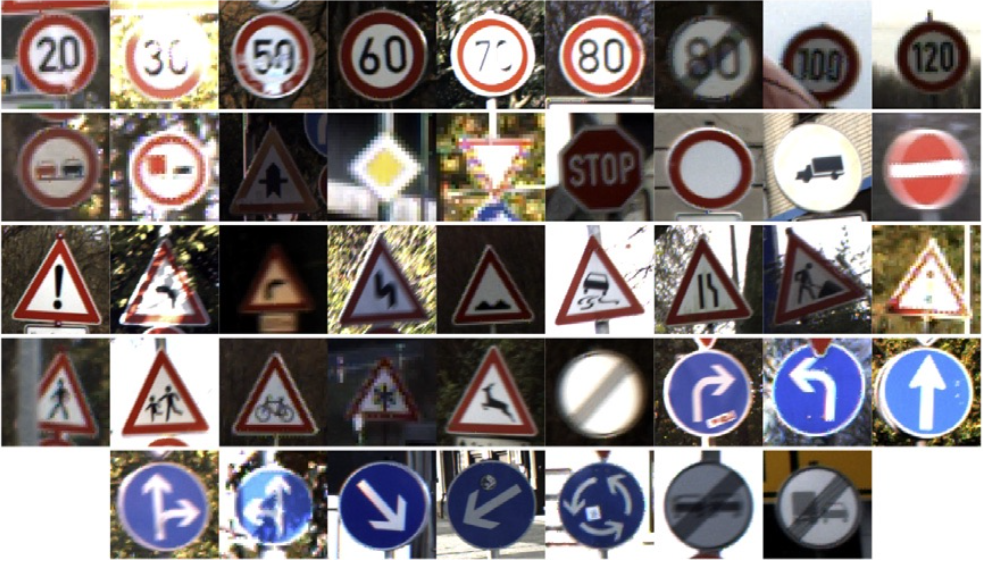

Each class sizes showed below:

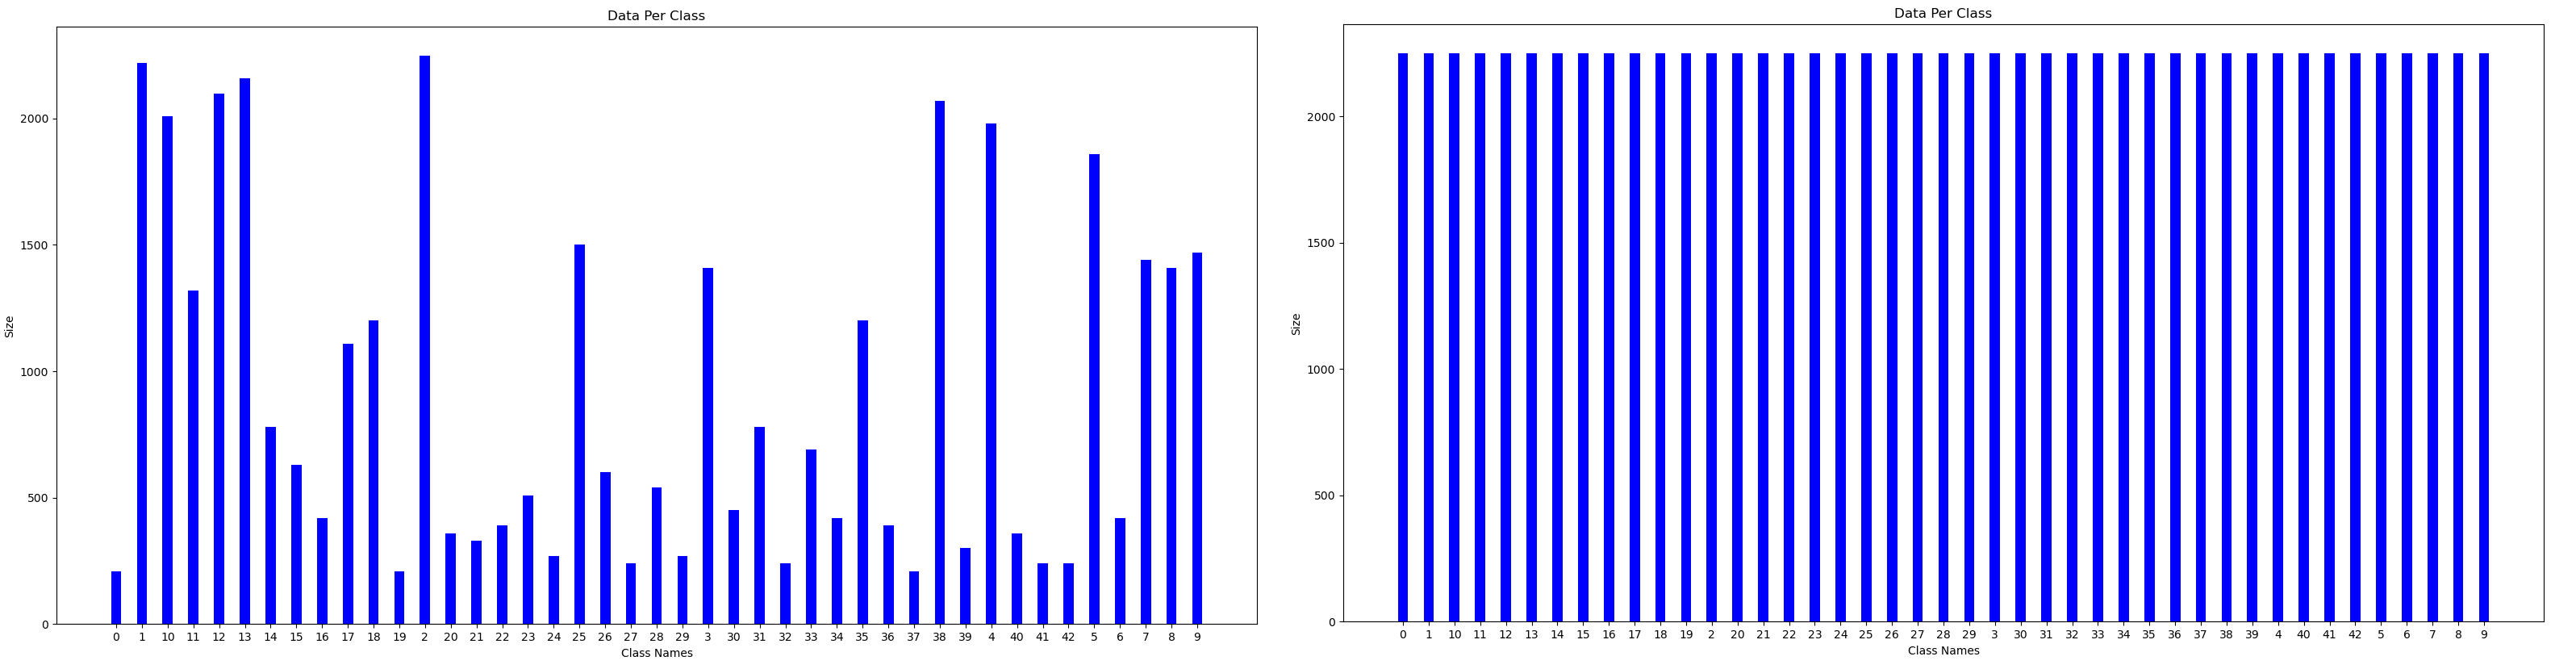

As can be seen from the graph, data per class is highly uneven.
Because of this, my model was quickly overfitting. For prevet to overfitting, augmentation implemented smaller-sized classes. 
After processing, the number of data in the classes became equal.

The meanings(names) of the traffic signs are as follows, in the same order as the class names:

In [ ]:
class_names =[
    'Speed Limit 20 km/h',
    'Speed Limit 30 km/h',
    'Speed Limit 50 km/h',
    'Speed Limit 60 km/h',
    'Speed Limit 70 km/h',
    'Speed Limit 80 km/h',
    'End of Speed Limit 80 km/h',
    'Speed Limit 100 km/h',
    'Speed Limit 120 km/h',
    'No Passing',
    'Overtaking Prohibited for Trucks',
    'Side Roads to Right and Left',
    'Piority Road Ahead',
    'Give Way to All Traffic',
    'Stop',
    'Entry Not Allowed / Forbidden',
    'Lorries - Trucks Forbidden',
    'No Entry (One-Way Traffic)',
    'Warning',
    'Road Ahead Curves to the Left Side',
    'Road Bends to the Right',
    'Double Curve Ahead to the Left Then to the Right',
    'Poor Road Surface Ahead',
    'Slippery Road Surface Ahead',
    'Road Gets Narrow On the Right Side',
    'Roadworks Ahead Warning',
    'Traffic Light Ahead',
    'Warning for Pedestrians',
    'Warning for Children And Minors',
    'Warning for Bikes And Cyclists',
    'Warning for Snow And Sleet',
    'Deer Crossing in Area - Road',
    'End of All Prohibitions and Restrictions',
    'Turning Right Compulsory',
    'Left Turn Mandatory',
    'Ahead Only',
    'Driving Straight Ahead or Turning Right Mandatory',
    'Driving Straight Ahead or Turning Left Mandatory',
    'Pass on Right Only',
    'Passing Left Compulsory',
    'Direction of Traffic on Roundabout',
    'End of the Overtaking Prohibition',
    'End of the Overtaking Prohibition for Trucks']

## About the Classification Model

The model uses ResNet50V2 as a base and imagenet weight as weight.There are 2 ways to use the pre-trained model with a custom dataset which is referred to as Transfer Learning.

<b>Tranfer Learning:</b> Transfer learning (TL) is a research problem in machine learning (ML) that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem.

While the model is being trained, the weights are assigned randomly at the beginning. Using the weights of the model that was previously trained on a dataset such as imagenet increases the accuracy rate and speed by providing a certain starting point.

<b>-Options in Transfer Learning: </b>
<ol>
    <li>Freeze The Trainable Layers:
        <br>
            This approach is the simplest, which is to freezes the layers transferred from the pre-trained model.
        <br>
        And then when it comes to training, only trains new added classifier layers like dense layers with pre-trained weights.
    <li>Training with Learned Values as Defaults:
        <br>
        Retrains entirely without freezing the trainable layers but uses the pre-trained weights as the starting points.
</ol>

The training stages of the model for this method are as follows:
<br>
<ul>
    <li>Get a pre-trained model with imagenet weights and set the include top option false</li>
    <li>Defined new top layer</li>
    <li>Train the all model with imagent weights</li>
</ul>

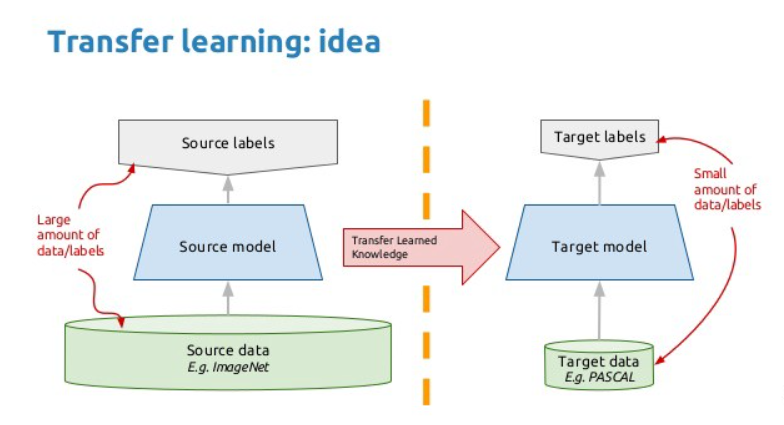

### ResNet50V2 Architecture

<b>ResNet50:</b>The ResNet-50 model consists of 5 stages each with a convolution and Identity block. Each convolution block has 3 convolution layers and each identity block also has 3 convolution layers. The ResNet-50 has over 23 million trainable parameters.

<ul>
    <li>ResNet uses Batch Normalization at its core. The Batch Normalization adjusts the input layer to increase the performance of the network. The problem of covariate shift is mitigated.</li>
    <li>ResNet makes use of the Identity Connection, which helps to protect the network from vanishing gradient problem.</li>
    <li>Deep Residual Network uses bottleneck residual block design to increase the performance of the network.</li>   
</ul>

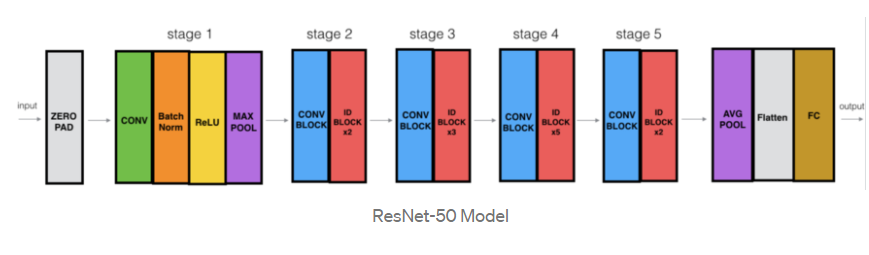

<b>ResNet50-V2:</b>ResNet50-V2 model uses the pre-activation of weight layers instead of post-activation.

Differences between ResNet50 and ResNet50-V2:
<br>
<ul>
    <li>ResNet V1 adds the second non-linearity after the addition operation is performed in between the x and F(x). ResNet V2 has removed the last non-linearity, therefore, clearing the path of the input to output in the form of identity connection.</li>
    <br>
    <li>ResNet V2 applies Batch Normalization and ReLU activation to the input before the multiplication with the weight matrix (convolution operation). ResNet V1 performs the convolution followed by Batch Normalization and ReLU activation.</li>
</ul>

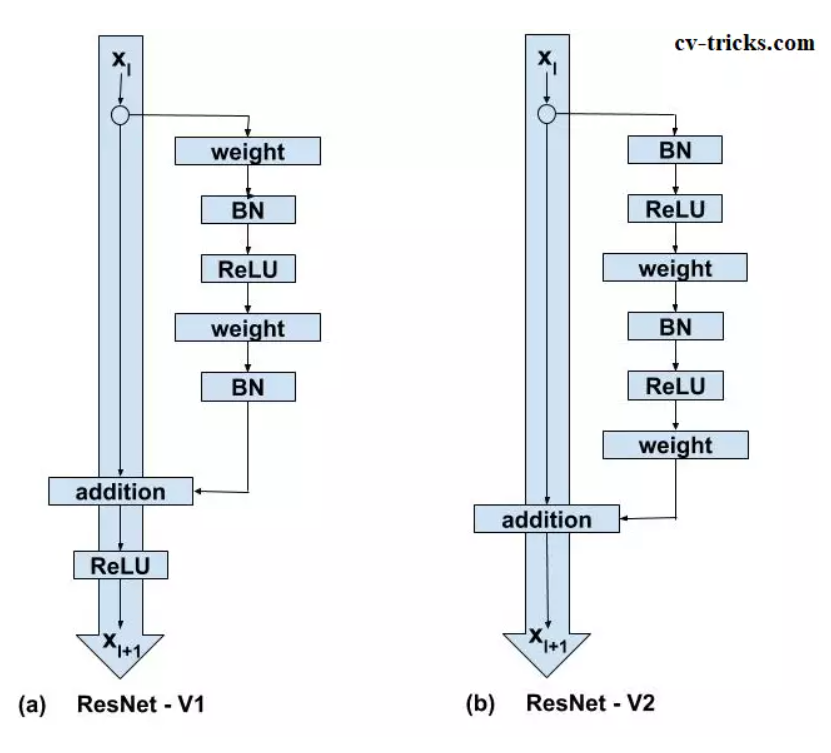

## Augmentation

Firstly, max size in the GTSRB dataset was found.If the other classes were smaller than this value, each was augmented to make up for the difference.

In [ ]:
#finds max size in dataset
def find_max_size(arr):
    return np.amax(arr)

#takes class size in training set
def get_class_sizes(arr,ROOT):
    class_names=os.listdir(ROOT)
    for cname in class_names:
        class_path=os.path.join(ROOT,cname)
        csize=len(os.listdir(class_path))
        arr.append(csize)
    return arr

After each augmentation phase was finished, the data of the class would be doubled. However, the class's data size could still be smaller than the maximum data. For this reason, the data size of the class was checked and updated at the end of each phase.

In [ ]:
#finds smaller sets and implements augmentation
def augmentation(path):
    ROOT=path
    class_sizes=[]
    class_sizes=get_class_sizes(class_sizes,ROOT)
    tmp_sizes=class_sizes
    class_names=os.listdir(ROOT)
    max_size=np.amax(tmp_sizes)
    
    for i in tqdm.tqdm(range(len(class_sizes))):

        #augmentation
        if class_sizes[i]<max_size:
            class_path=os.path.join(ROOT,class_names[i])
            
            #finds image names in the class
            img_names=os.listdir(class_path)
            
            #opens images in the class
            id=0
            ii=0
            process_size=max_size-tmp_sizes[i]
            while ii <=process_size:
                img_path=os.path.join(class_path,img_names[ii])
                img_out_path=os.path.join(class_path,str(id)+"a.png")
                print(img_path)
                
                #implements augmentation
                img=Image.open(img_path)
                aug_img=apply_augmentation(img)
                aug_img.save(img_out_path)
                id+=1
                ii+=1
                #if after augmentation, class size is still smaller than max size, repeat the process
                if ii==class_sizes[i]:
                    img_names=os.listdir(class_path)
                    class_sizes[i]=len(img_names)

Methods used here are rotating images 15 and 30 degrees, increasing and decreasing the brightness, adding noise, and lastly changing color saturation.

In [ ]:
#applys random augmentation method to the image 
def apply_augmentation(img):

    rnd=random.randint(0,7)

    #rotates img 15 degree
    if rnd==0:
        rotated = img.rotate(15)
        return rotated

    #rotates img 30 degree
    if rnd==1:
        rotated=img.rotate(30)
        return rotated

    #increases brightness
    if rnd==2:
        enhancer = ImageEnhance.Brightness(img)
        im_output = enhancer.enhance(1.25)
        return im_output
    
    #decreases brightness
    if rnd==3:
        enhancer = ImageEnhance.Brightness(img)
        im_output = enhancer.enhance(0.75)
        return im_output

    #adds noise 
    if rnd==4:
        im_output = img.filter(ImageFilter.GaussianBlur(1))
        return im_output
    
    #changes color saturation
    if rnd==5:
        converter = ImageEnhance.Color(img)
        im_output = converter.enhance(0.5)
        return im_output
    
    if rnd==6:
        converter = ImageEnhance.Color(img)
        im_output = converter.enhance(1)
        return im_output

    if rnd==7:
        converter = ImageEnhance.Color(img)
        im_output = converter.enhance(2)
        return im_output

Images after augmentation are as follows(first ones is original images):

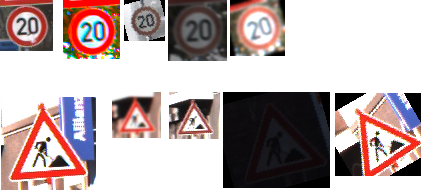

## Training

Training function implements augmentation to the training dataset after that calls prepare_data function. With the prepare_data function, the training dataset's images turn NumPy array and the training dataset's labels will be one-hot encoded for classification.

Since there are 43 classes in the dataset, the classification layer of the model has been added with 43 units.(classifier).The model was trained for 10 epochs with the augmented dataset.

In [ ]:
def training(path,ROOT):
    augmentation(path)
    train_x,val_x,train_y,val_y=prepare_data(path)
    model_base = tf.keras.applications.resnet_v2.ResNet50V2(weights='imagenet', include_top=False, pooling='max', input_shape = (32,32, 3))
    
    model = models.Sequential()
    #adds classifier layer to resnet50v2
    model.add(model_base)
    model.add(keras.layers.Dense(43, activation='softmax')) 

    train_step=train_x.shape[0]//32 #to find step size, the training dataset must be split with batch size. In this scenario batch size is 32

    model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.00005), metrics = ['accuracy'])
    history = model.fit(train_x, train_y, batch_size=32, steps_per_epoch=train_step,epochs=10,validation_data=(val_x, val_y),verbose=1)
    
    model.save(os.path.join(ROOT,"classification_model.h5"))
    plt.plot(history.history['loss'],label='training loss list')
    plt.plot(history.history['val_loss'],label='validation loss list')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'],label="accuracy")
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

The model looks pretty ready for prediction.

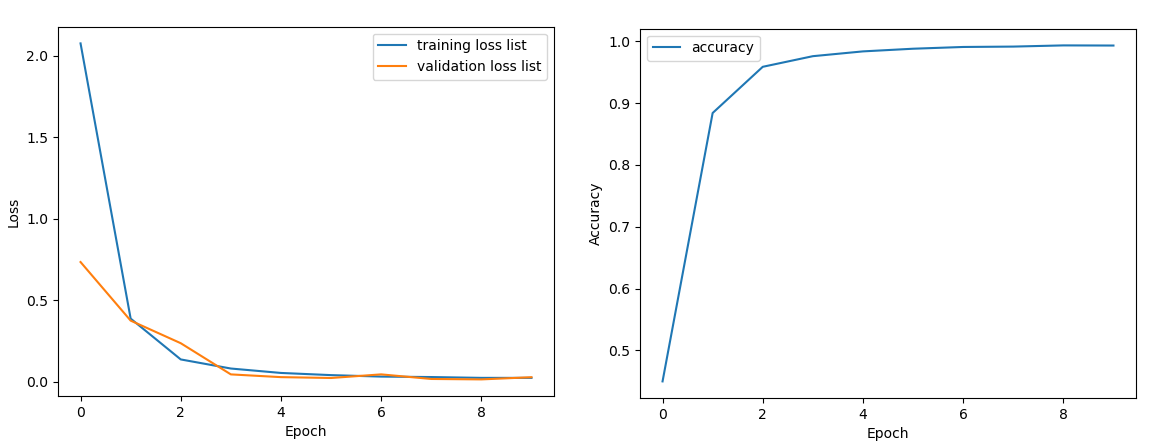

## Prediction

In the visualization phase, 4 helper functions and one main function defined.These are: get_sign_name, return_ids, prepare_test_set, get_prediction and visualization.
<br>
<b>get_sign_name:</b>Takes project's path as an argument and returns sign name(or meaning) from the list.
<br>
<b>return_ids:</b>Takes project's path as an argument. Reads "Test.csv" from GTSRB and returns test data's ids(ground truth).
<br>
<b>prepare_test_set:</b>:Takes project's path as an argument. Reads test images paths from "Test.csv", opens them, and converts to NumPy array.Returns test images.
<br>
<b>get_prediction:</b>Takes project's path as an argument. Loads trained multi-class classification model, gets a prediction from the model, and returns it.
<br>
<b>visualization:</b>Takes project's path as an argument. It runs four functions from above, draws images with prediction, name, and ground truth.

In [ ]:
def visualization(ROOT):
    model_prediction=get_prediction(ROOT) #gets predictions
    id=return_ids(ROOT) #gets labels
    test_set=prepare_test_set(ROOT) #gets images

    fig = plt.figure(figsize=(20,14))
    rows = 4
    columns = 4
    ii=1
    for i in range(1,17):
        image = test_set[i]
        fig.add_subplot(rows, columns, ii)
        plt.subplots_adjust(top = 0.9, bottom=0.1, hspace=1, wspace=0.4)
        ii+=1
        plt.imshow(image)
        plt.axis('off')
        plt.title("Class id(prediction): {pred}".format(pred=model_prediction[i])+"\n"+
                   get_sign_name(model_prediction[i])+"\n"+
                   "Ground Truth: {gt}".format(gt=id[i]),fontsize=10)
    plt.show()

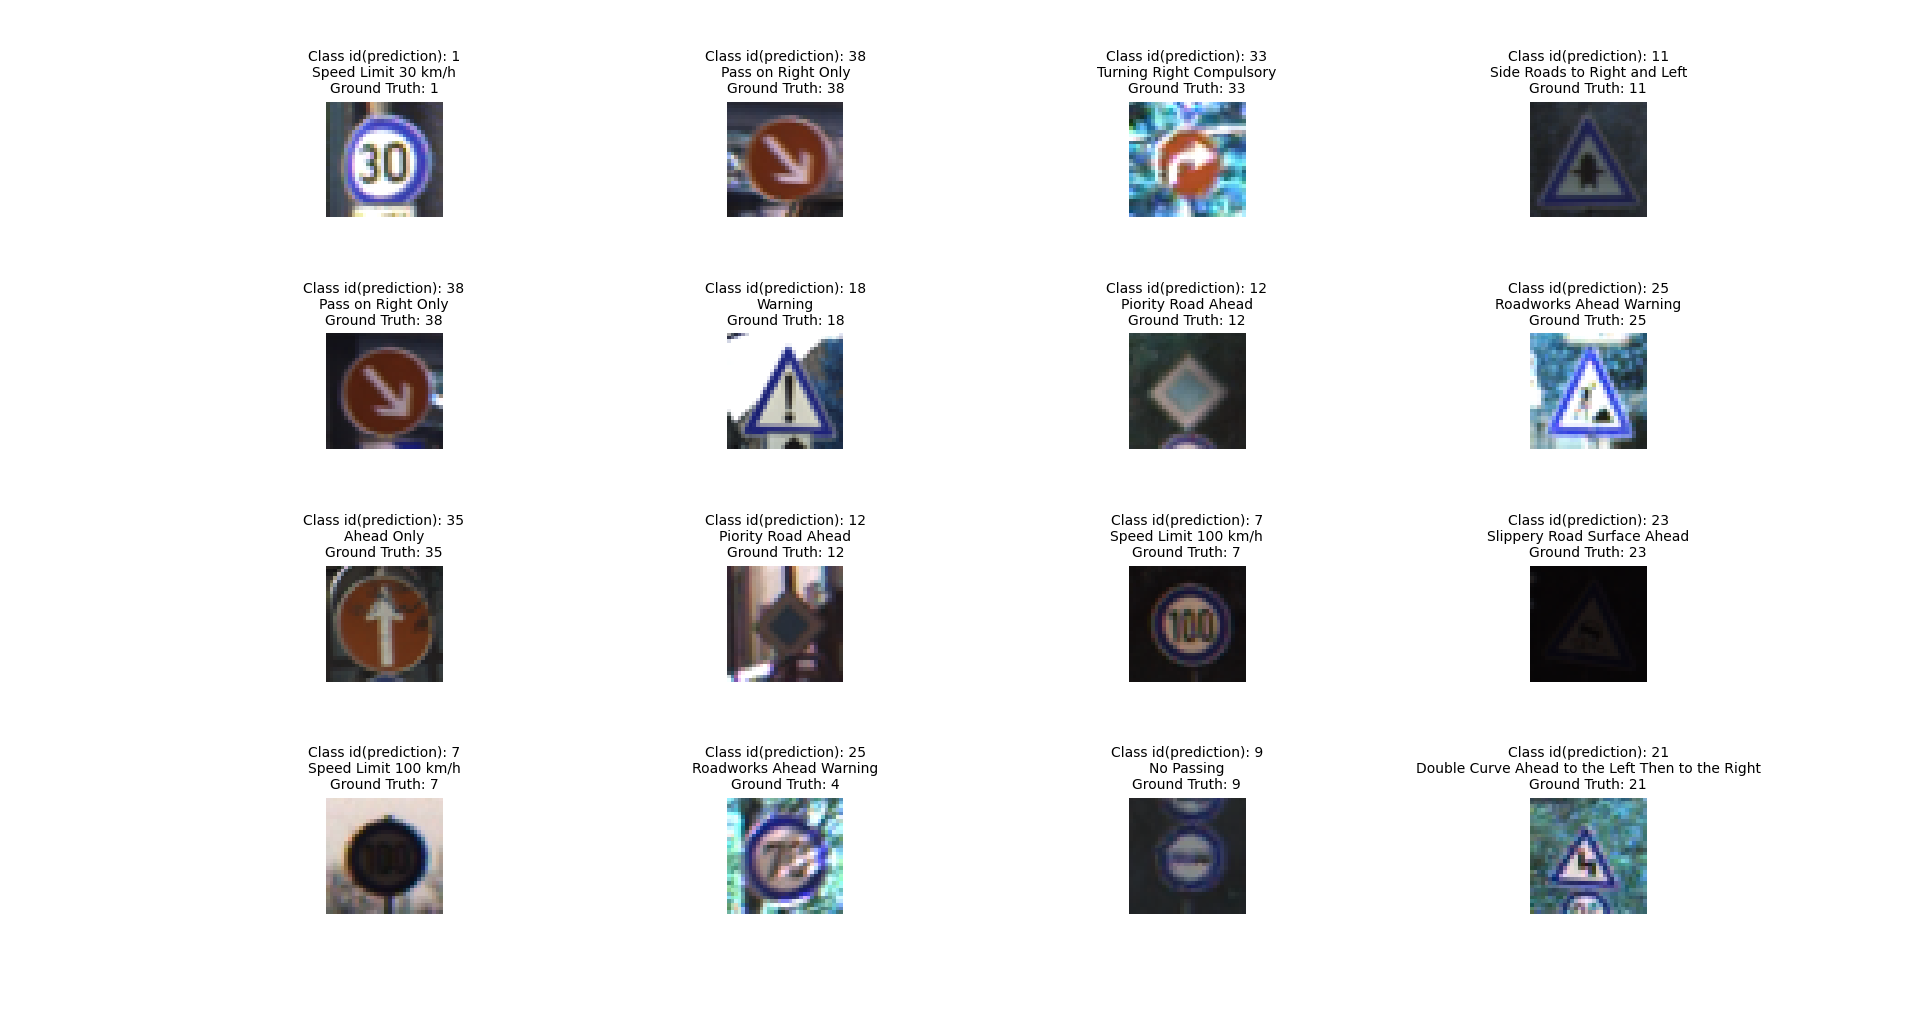

### References:

<a href='https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign'>GTSRB</a>
<br>
<a href="https://en.wikipedia.org/wiki/Transfer_learning#:~:text=Transfer%20learning%20(TL)%20is%20a,when%20trying%20to%20recognize%20trucks."> Transfer Learning-1 </a>
<br>
<a href='https://keras.io/guides/transfer_learning/'>Transfer Learning-2 </a>
<br>
<a href="https://towardsdatascience.com/transfer-learning-with-convolutional-neural-networks-in-pytorch-dd09190245ce">Transfer Learning Graph Source </a>
<br>
<a href='https://cv-tricks.com/keras/understand-implement-resnets/'>Detailed Guide to Understand and Implement ResNets</a>
<br>
<a href='https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33'>ResNet</a>
<br>
<a href='https://cv-tricks.com/keras/understand-implement-resnets/'>ResNet50-2</a>